In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
#--------Mean/Median/Precentile-------#

In [74]:
df = pd.read_csv("Excels\\income.csv",names=['name','income'],skiprows=[0]) 
# Renaming columns names to 'name','income'
# skipping headers names
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [75]:
df.describe() # simple stats

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


In [76]:
# Treating Outliers

In [77]:
df['income'].quantile(0.25 ,interpolation = 'lower') # gets the 25% precentile
# interplation = 'lower' means will take the lower average in even sets


5000

In [78]:
precentile_99 = df['income'].quantile(0.999)
precentile_99           # to identify outliers

9940048.000000007

In [79]:
df_no_outlier = df[df.income<precentile_99]
df_no_outlier

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


In [80]:
# Filling missing value

df['income'][3]=np.NaN

C:\Users\musta\AppData\Local\Temp\ipykernel_11472\3142182208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][3]=np.NaN


In [81]:
df

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [82]:
# You can fill a NaN with median or mean 
# Mean is bad when u have an outlier as it skews it
# median is more consistent

In [83]:
df_new = df.fillna(df.income.median())
df_new


,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [84]:
#----------Normal Distribution/Z-Score----------#

In [85]:
df= pd.read_csv("Excels\\heights.csv")
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [86]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

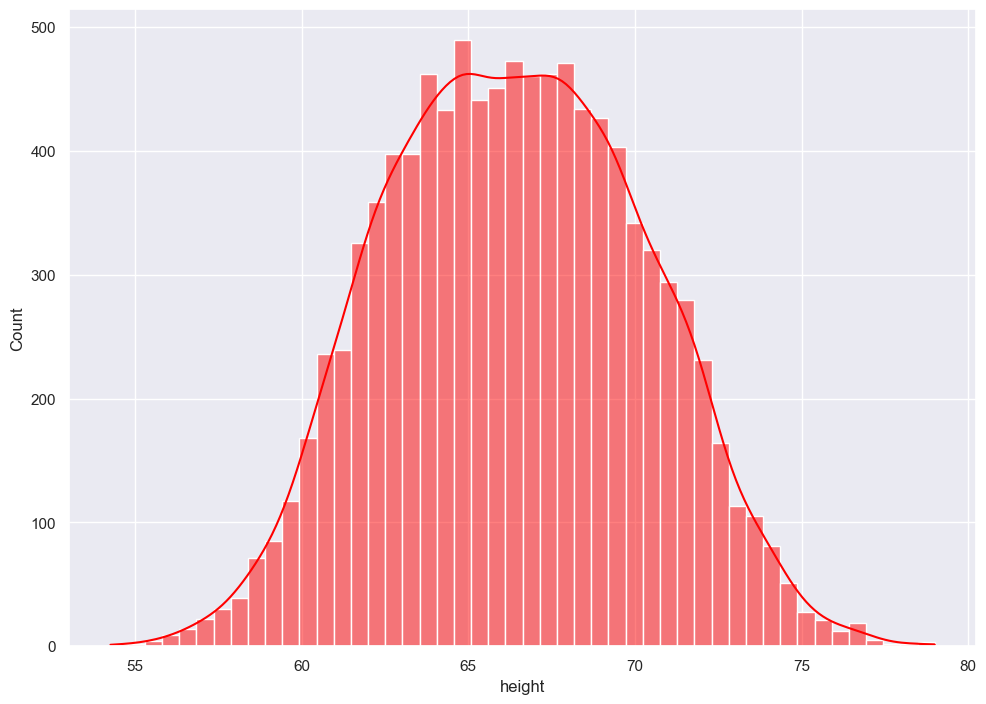

In [87]:
sns.histplot(df.height,kde=True,color ='red')
plt.show()

In [88]:
#----------------Standard Devation----------#

In [89]:
mean_stat = df.height.mean()
mean_stat

66.367559754866

In [90]:
std_dev_stat = df.height.std() 
std_dev_stat 

3.847528120795573

In [91]:
neg_std = mean_stat - 3*std_dev_stat  # least number in the third std
neg_std

54.824975392479274

In [92]:
pos_std = mean_stat + 3*std_dev_stat # max number in the third std
pos_std

77.91014411725271

In [93]:
# Any number outside the range of third std is an outlier

In [94]:
df[(df.height < neg_std) | (df.height>pos_std)] # those are outliers

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [95]:
df_no_outlier = df[(df.height > neg_std) & (df.height < pos_std)]
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [96]:
#---Z_Score---#

In [97]:
df['zscore'] = (df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


<Axes: xlabel='zscore', ylabel='Count'>

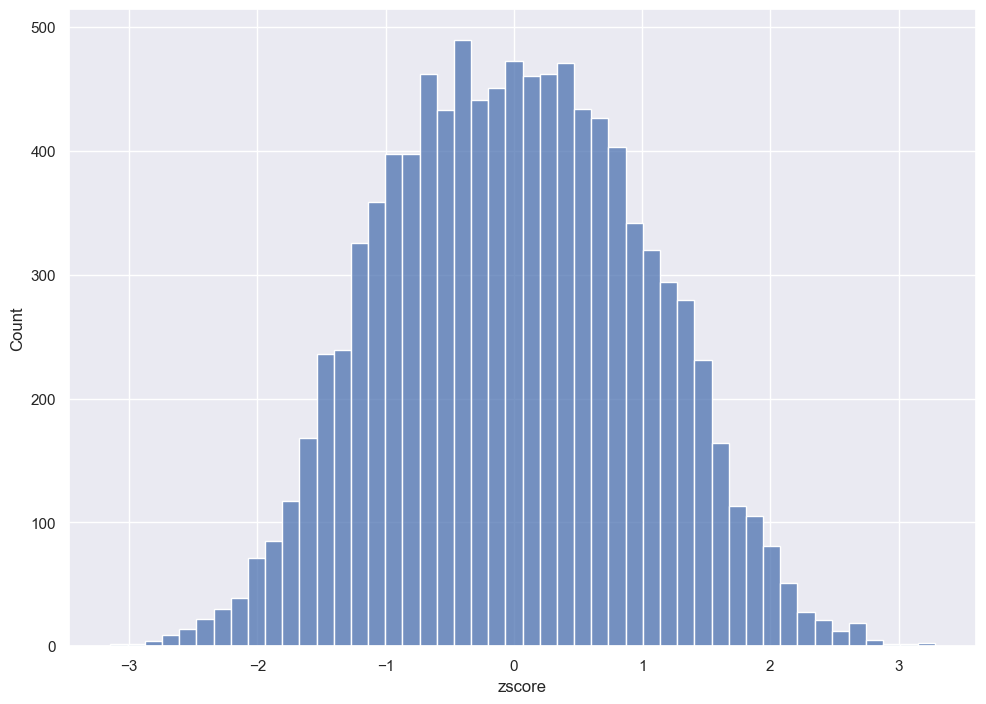

In [98]:
sns.histplot(df.zscore)

In [99]:
df[(df.zscore>3) | (df.zscore< -3)] # Outliers

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [100]:
df_no_outlier = df[(df.zscore < 3) & (df.zscore > -3)]
df_no_outlier

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [101]:
#-----------------LOGARTHIM--------------#

In [102]:
df = pd.read_csv('Excels\\revenue.csv')
df

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<Axes: xlabel='company'>

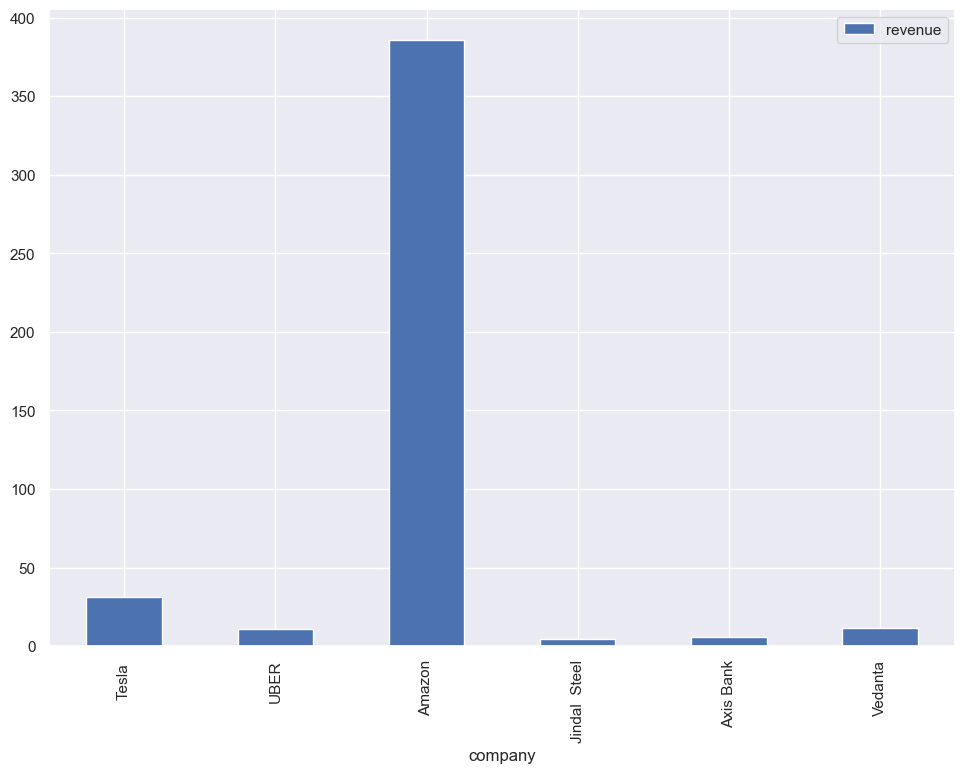

In [103]:
df.plot(x='company',y='revenue',kind='bar') # Use logy = True , when 1 bar is overcoming and making other bar small

<Axes: xlabel='company'>

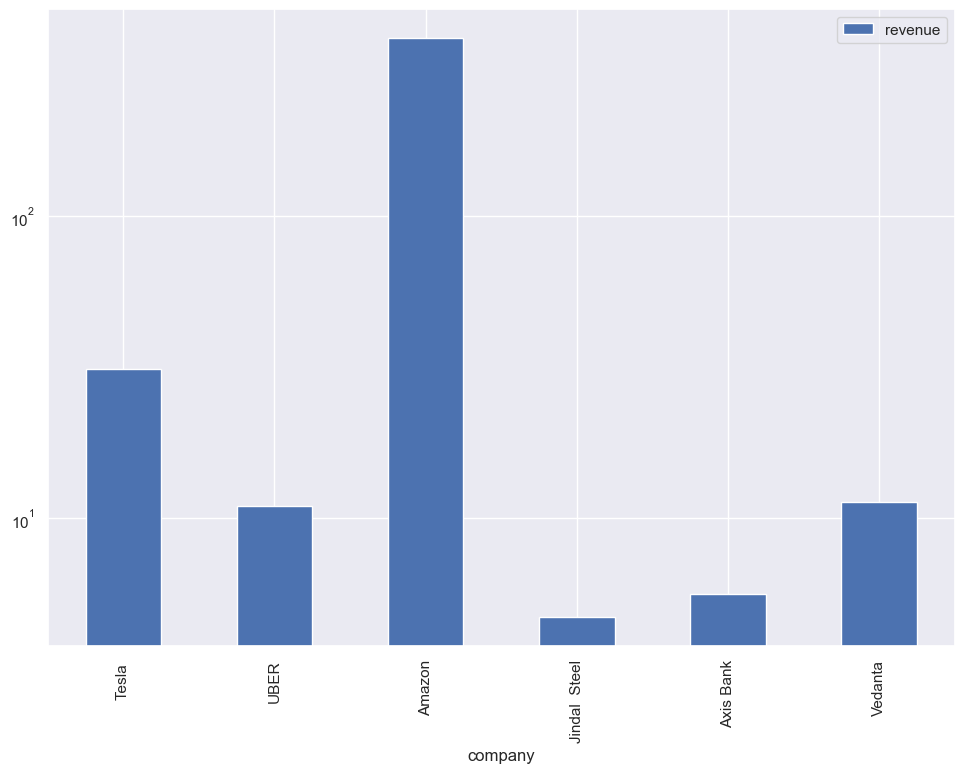

In [104]:
df.plot(x='company',y='revenue',kind='bar',logy=True) # Use logy = True , when 1 bar is overcoming and making other bar small

In [105]:
#----------Log Normal Distribution--------------#

In [106]:
df = pd.read_csv('Excels\\usa_income.csv',names=['income','count'],skiprows=1)
df.head()

,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


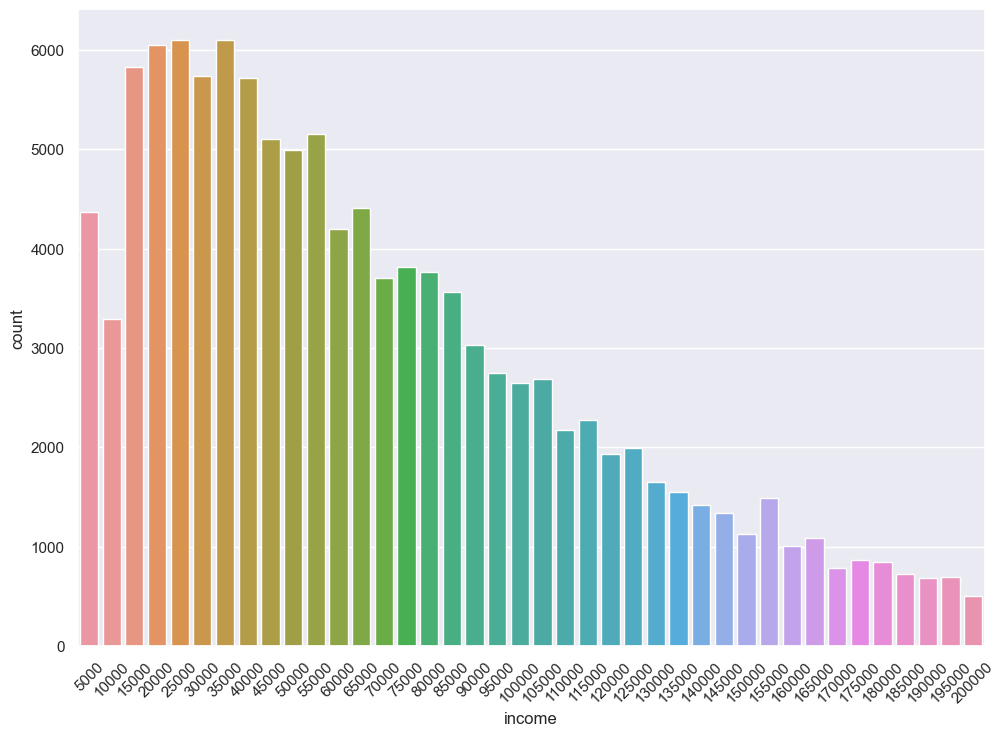

In [107]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df)
plt.xticks(rotation=45)
plt.show()

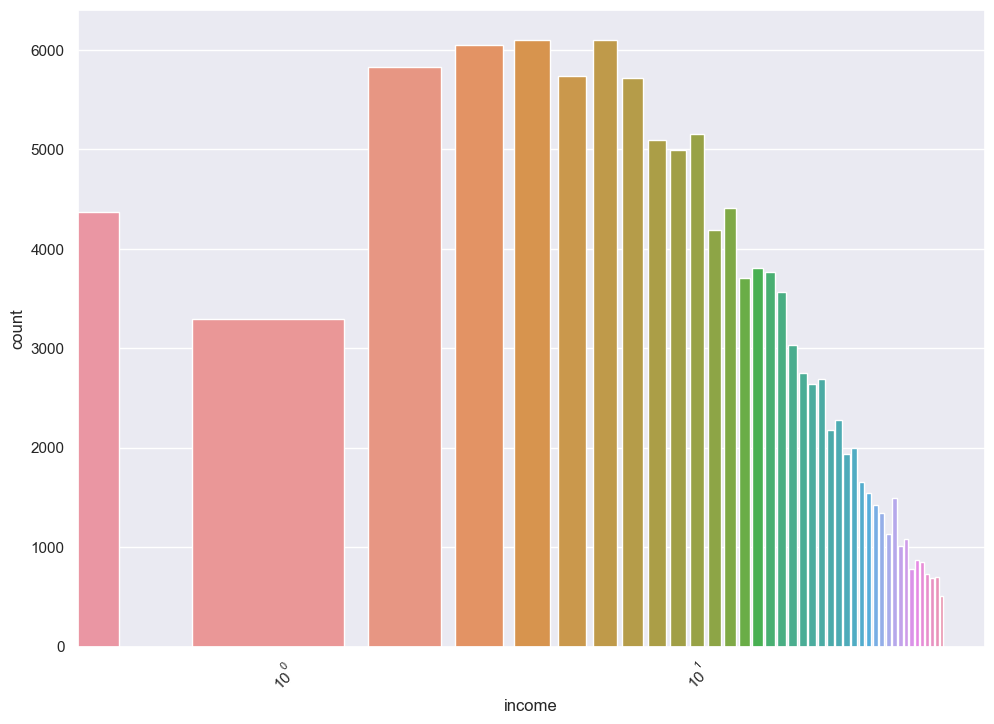

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income', y='count', data=df)
plt.xticks(rotation=45)
g.set(xscale='log')
plt.show()

In [109]:
#-----------SIN_COS_TAN----------#

In [110]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances # VERY IMP FOR MACHINE LEARNING

In [ ]:
# We use Cosine_similiarty and distances in docmunets so that we can compare different documents with each other
# So we can annote every document using Machine learning rather than manual annoting

In [114]:
cosine_similarity([[3,1]],[[6,2]]) # expects 2 vectors  
# if output 1 , means very similiar
# 0 = different

array([[1.]])

In [118]:
cosine_distances([[3,1]],[[6,2]])
# this is very close to 0
# cos_distance is 1 - cosine similiarity

array([[1.11022302e-16]])

In [119]:
cosine_similarity([[3,1]],[[3,2]])

array([[0.96476382]])

In [ ]:
doc1 = """
iphone sales contributed to 70% of revenue. iphone demand is increasing by 20% yoy. 
the main competitor phone galaxy recorded 5% less growth compared to iphone"
"""

doc2 = """
The upside pressure on volumes for the iPhone 12 series, historical outperformance 
in the July-September time period heading into launch event, and further catalysts in relation
to outperformance for iPhone 13 volumes relative to lowered investor expectations implies a 
very attractive set up for the shares.
"""

doc3 = """
samsung's flagship product galaxy is able to penetrate more into asian markets compared to
iphone. galaxy is redesigned with new look that appeals young demographics. 60% of samsung revenues
are coming from galaxy phone sales
"""

doc4 = """
Samsung Electronics unveils its Galaxy S21 flagship, with modest spec improvements 
and a significantly lower price point. Galaxy S21 price is lower by ~20% (much like the iPhone 12A), 
which highlights Samsung's focus on boosting shipments and regaining market share.
"""

In [122]:
df = pd.DataFrame([
    {'iPhone':3,'galaxy':1},
    {'iPhone':2,'galaxy':0},
    {'iPhone':1,'galaxy':3},
    {'iPhone':1,'galaxy':2}
],
    index = [
        'doc1',
        'doc2',
        'doc3',
        'doc4',
    ]

)

In [123]:
df

,iPhone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [124]:
df.loc['doc1':'doc1'] # we write it like this (index :) because in cos_similarity it expects 2d array

,iPhone,galaxy
doc1,3,1


In [125]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc["doc2":"doc2"])
# close to 1 so both 2 Apple Docs

array([[0.9486833]])

In [127]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc["doc3":"doc3"])
# Abit more far 

array([[0.6]])

In [130]:
cosine_similarity(df.loc["doc3":"doc3"],df.loc["doc4":"doc4"])


array([[0.98994949]])

In [129]:
cosine_distances(df.loc["doc3":"doc3"],df.loc["doc4":"doc4"])
# cos_distance is 1 - cosine similiarity

array([[0.01005051]])